# Topic Modeling with responses to stat based questions.
Question 2: Define and explain the two standard errors: SE of MEans and SE of Difference.

# Importing the necessary packages
### Use chunk below in terminal to install Scikit learn
python -m venv sklearn-env
sklearn-env\Scripts\activate  # activate
pip install -U scikit-learn

### Use chunk below to verify the installation
python -m pip show scikit-learn  
python -m pip freeze   
python -c "import sklearn; sklearn.show_versions()"

In [17]:
import json

def load_data(file):
    with open(file, "r", encoding = "utf-8") as f:
        data = json.load(f)
    return(data)



In [18]:
Stats_data = load_data(r"C:\Users\isaia\OneDrive\Desktop\Academic work\Scholarly activities\Research voluntering\Research voluntering 2024 Dr. Sanocki\Stats & LLM\Topic-modeling\Stats_T.M_LDA\Data\Json Format\Sanocki_Stats_Data.json")

for key in list(Stats_data.keys())[:5]:
   print(key, Stats_data[key])

    

ID_code ['O.A', 'I.A', 'J.B', 'P.C', 'K.C', 'A.C', 'A.G', 'A.K', 'K.K', 'E.L', 'C.MD', 'S.M', 'O.P', 'T.P', 'A.Q', 'A.R', 'E.R', 'G.T', 'S.T']
Question 1 ['Error helps determine the strength of the experiment and the power to reject the null hypothesis.', 'The role that error plays in statistical inference has to do with type one and type two error. Error helps us determine our null hypothesis. Meaning, did our results occur as a result of the independent variable? Or did it occur by chance, or error.', 'Error plays a role in statistical inference by showing between and within group differences. Error also shows where the data differs. In stats, error is always involved and is a part of many aspects of stats.', 'Error lets you know if the results of the study were purely due to chance. Error describes the difference WITHIN groups.', 'Error allows us to gain knowledge on a population and what has statistical significance.', "The role that error plays in statistical inference is that an 

In [19]:
print(Stats_data.keys()) 
ID_code = Stats_data["ID_code"]
Question_2 = Stats_data["Question 2"]   

dict_keys(['ID_code', 'Question 1', 'Question 2', 'Question 3'])


In [20]:
print(ID_code[0])
print(Question_2[0])
print()

print("Total number of participants in ID code:", len(ID_code))
print("Total number of responses for question 1:", len(Question_2))

O.A
SE of Mean tells you how far the sample mean is from the main mean (population). SE of Difference is the difference between the two SE of Mean.

Total number of participants in ID code: 19
Total number of responses for question 1: 19


In [21]:
import string 
from nltk.corpus import stopwords  


custom_stopwords = ["also", "occur", "lets", "us", "likely", "would", "make", "may", "know", "aka", "ok", "versa", "vice", "well", "way"]
stops = stopwords.words("english") + custom_stopwords  

def clean_docs(docs):
    stops = stopwords.words("english")

    final = [] 
 
    for doc in docs:
        clean_doc = remove_stop_punc(doc, stops)
        final.append(clean_doc)

    return(final)    


def remove_stop_punc(text, stops):
    words = text.split()
    final = []
    for word in words:
        if word.lower() not in stops:
            final.append(word) 

    final = " ".join(final)

    final = "".join([i for i in final if not i.isdigit()])

    final = final.replace("/", " ")

    final = final.replace("-", " ")

    final = final.translate(str.maketrans("", "", string.punctuation + "()"))

    while "  " in final:
        final = final.replace("  ", " ")
    return (final)



In [22]:
cleaned_Question_2 = clean_docs(Question_2)
cleaned_Question_2 = [remove_stop_punc(doc, stops) for doc in cleaned_Question_2]

print("Original Q2 data:")
print(Question_2[0] + "\n")

print("Cleaned Q2 data:")
print(cleaned_Question_2[0] + "\n")


Original Q2 data:
SE of Mean tells you how far the sample mean is from the main mean (population). SE of Difference is the difference between the two SE of Mean.

Cleaned Q2 data:
SE Mean tells far sample mean main mean population SE Difference difference two SE Mean



In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer( 
                                lowercase = True,
                                max_features = 300,
                                max_df = .75,
                                min_df = 1,
                                ngram_range = (1, 1),
                                stop_words = "english"
)

vectors_Q2 = vectorizer.fit_transform(cleaned_Question_2)
print(vectors_Q2[0:1])


  (0, 88)	0.5846542859393999
  (0, 107)	0.3554275639903748
  (0, 41)	0.32503352070394587
  (0, 82)	0.26101504215979854
  (0, 57)	0.44984008582095103
  (0, 68)	0.39461230095154637


In [24]:
feature_names = vectorizer.get_feature_names_out() 

sparse_vectors_scores = vectors_Q2[0]

for index, score in zip(sparse_vectors_scores.indices, sparse_vectors_scores.data):
    print("word:", feature_names[index], "---> TF-IDF Score:", {score})

word: se ---> TF-IDF Score: {0.5846542859393999}
word: tells ---> TF-IDF Score: {0.3554275639903748}
word: far ---> TF-IDF Score: {0.32503352070394587}
word: sample ---> TF-IDF Score: {0.26101504215979854}
word: main ---> TF-IDF Score: {0.44984008582095103}
word: population ---> TF-IDF Score: {0.39461230095154637}


In [25]:
dense = vectors_Q2.todense()
print(dense[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.32503352
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.44984009 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.3946123  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26101504 0.
  0.         0.         0.         0.         0.58465429 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.      

In [26]:
dense_list = dense.tolist()
print(dense_list[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32503352070394587, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.44984008582095103, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.39461230095154637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26101504215979854, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5846542859393999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3554275639903748, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [27]:
all_keywords = []
for description in dense_list:
    x = 0
    keywords = []
    for word in description:
        if word > .25:
            keywords.append(feature_names[x])
        x += 1
    all_keywords.append(keywords)


# comparison of documents from begining and through processing
print ("Original Text:")
print (Question_2[0]+"\n")

print ("Cleaned Text:")
print (cleaned_Question_2[0]+"\n")

print ("Only Keywords Text:")
print (all_keywords[0])

Original Text:
SE of Mean tells you how far the sample mean is from the main mean (population). SE of Difference is the difference between the two SE of Mean.

Cleaned Text:
SE Mean tells far sample mean main mean population SE Difference difference two SE Mean

Only Keywords Text:
['far', 'main', 'population', 'sample', 'se', 'tells']


In [28]:
true_k = min(2, len(vectors_Q2.toarray()) // 2)  

model = KMeans(
    n_clusters = true_k,         
    init = "random",   
    max_iter = 100,        
    n_init = 50,          
    random_state = 1      
)

model.fit(vectors_Q2)  

order_centroids = model.cluster_centers_.argsort()[:, ::-1]  

terms = vectorizer.get_feature_names_out()

print("Top words for each cluster")
for i in range(true_k):
    top_words = [terms[ind] for ind in order_centroids[i, :5]]  
    print(f"Cluster {i + 1}: {', '.join(top_words)}")

 

Top words for each cluster
Cluster 1: se, sample, far, compares, population
Cluster 2: error, standard, means, data, samples


In [29]:
i = 0 
for clusters in order_centroids:
    print(f"Cluster {i}")
    for keyword in clusters[0:5]:
        print(terms[keyword])
    print("")
    i = i + 1

Cluster 0
se
sample
far
compares
population

Cluster 1
error
standard
means
data
samples



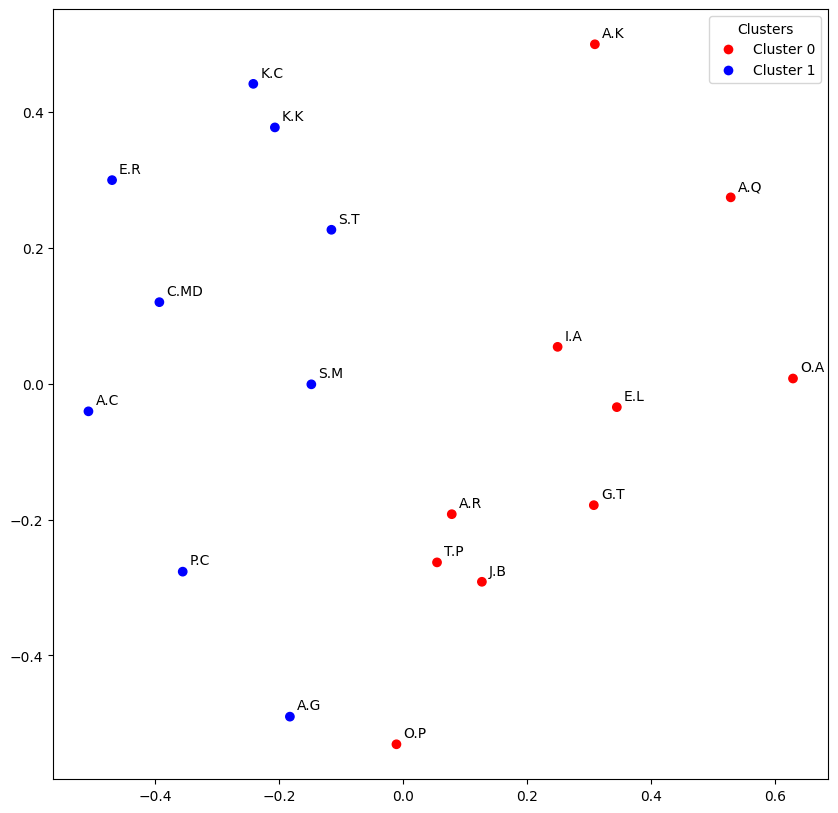

ID: O.A| Keywords: far, main, population, sample, se, tells
ID: I.A| Keywords: population, sample, se
ID: J.B| Keywords: dividing, number, sds, se, sem, squaring
ID: P.C| Keywords: adding, differ, instead, kind, samples, shows, sqaure, standard, using
ID: K.C| Keywords: calculates, data, error, means, se, set, standard
ID: A.C| Keywords: error, individual, reference, standard
ID: A.G| Keywords: sample, sd, size, square, squared, standard
ID: A.K| Keywords: data, describes, far, represents, se, set, values, variability
ID: K.K| Keywords: average, data, error, identifies, measures, sed, sem, set, sets
ID: E.L| Keywords: control, experimental, group, se
ID: C.MD| Keywords: error, groups, refers, type
ID: S.M| Keywords: means, process, refers, takes
ID: O.P| Keywords: divided, effect, iv, root, sd, sem, sqaured, square
ID: T.P| Keywords: hypothesis, measure
ID: A.Q| Keywords: data, far, results, se
ID: A.R| Keywords: compares, sample
ID: E.R| Keywords: associated, data, error, separate, se

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

kmean_indices = model.predict(vectors_Q2)

num_components = min(2, len(vectors_Q2.toarray()))  
pca = PCA(n_components=num_components)
scatter_plot_points = pca.fit_transform(vectors_Q2.toarray())

colors = ["red", "blue"]

num_clusters = len(set(kmean_indices))  
cluster_colors = colors[:num_clusters]  

x_axis = scatter_plot_points[:, 0]
y_axis = scatter_plot_points[:, 1]

fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(x_axis, 
                     y_axis, 
                     c=[colors[d] for d in kmean_indices]
                     )

for i, txt in enumerate(ID_code):
    ax.annotate(txt[0:11], 
                (x_axis[i], 
                 y_axis[i]), 
                textcoords="offset points", 
                xytext=(5,5), 
                fontsize = 10)


handles = [plt.Line2D([0],[0],
                        marker = "o",
                        color = "w",
                        markerfacecolor = colors[i],
                        markersize = 8) for i in range(num_clusters)
            ]

ax.legend(handles, 
          [f"Cluster {i}" for i in range(num_clusters)], 
          title = "Clusters")

# Show Plot
plt.show()

for id_code, keywords in zip(ID_code, all_keywords):
    print(f"ID: {id_code}| Keywords: {', '.join(keywords)}")
